In [54]:
#@title Code - Load dependencies

#general
import io

# data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data visualization
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

In [55]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# File path in Google Drive
fueltrain_dataset = '/content/drive/My Drive/Colab Notebooks/fuel_train.csv'

# Read the CSV into a DataFrame
df = pd.read_csv(fueltrain_dataset)

# Display first few rows of the DataFrame
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,VOLKSWAGEN,GTI,COMPACT,2.0,4,M5,X,11.2,228
1,2000,DODGE,DAKOTA 4X4,PICKUP TRUCK - STANDARD,4.7,8,M5,X,18.8,382
2,2000,GMC,C1500 SIERRA,PICKUP TRUCK - STANDARD,4.8,8,M5,X,18.9,373
3,2000,FORD,F150 4X4,PICKUP TRUCK - STANDARD,4.6,8,A4,X,18.5,380
4,2000,FORD,F150 4X4,PICKUP TRUCK - STANDARD,4.2,6,A4,X,17.3,359


In [56]:
print(df.columns)


Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')


In [57]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Now select the columns
training_df = df[['VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS']]


In [58]:
#@title Code - Read dataset

# Updates dataframe to use specific columns.
training_df =df[['VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',	'TRANSMISSION',	'FUEL',	'FUEL CONSUMPTION',	'COEMISSIONS']]

print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

Read dataset completed successfully.
Total number of rows: 511




,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,COMPACT,2.0,4,M5,X,11.2,228
1,PICKUP TRUCK - STANDARD,4.7,8,M5,X,18.8,382
2,PICKUP TRUCK - STANDARD,4.8,8,M5,X,18.9,373
3,PICKUP TRUCK - STANDARD,4.6,8,A4,X,18.5,380
4,PICKUP TRUCK - STANDARD,4.2,6,A4,X,17.3,359
...,...,...,...,...,...,...,...
195,COMPACT,2.8,6,M5,Z,14.3,288
196,MID-SIZE,4.4,8,A5,Z,15.4,308
197,STATION WAGON - MID-SIZE,2.8,6,M5,Z,13.4,262
198,SUBCOMPACT,2.0,4,M5,X,11.2,230


In [59]:
#@title Code - View dataset statistics

print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.describe(include='all')

Total number of rows: 511




,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
count,511,511.000000,511.000000,511,511,511.000000,511.000000
unique,14,NaN,NaN,7,5,NaN,NaN
top,COMPACT,NaN,NaN,A4,X,NaN,NaN
freq,87,NaN,NaN,256,372,NaN,NaN
mean,NaN,3.206654,5.726027,NaN,NaN,14.532485,293.213307
std,NaN,1.194413,1.520864,NaN,NaN,3.164069,63.158713
min,NaN,1.000000,3.000000,NaN,NaN,4.900000,104.000000
25%,NaN,2.200000,4.000000,NaN,NaN,12.200000,251.000000
50%,NaN,3.000000,6.000000,NaN,NaN,14.200000,283.000000
75%,NaN,4.000000,6.000000,NaN,NaN,16.500000,336.000000


In [60]:
#@title Code - View correlation matrix
training_df.corr(numeric_only = True)

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
ENGINE SIZE,1.000000,0.899827,0.867575,0.856685
CYLINDERS,0.899827,1.000000,0.816789,0.791469
FUEL CONSUMPTION,0.867575,0.816789,1.000000,0.980528
COEMISSIONS,0.856685,0.791469,0.980528,1.000000


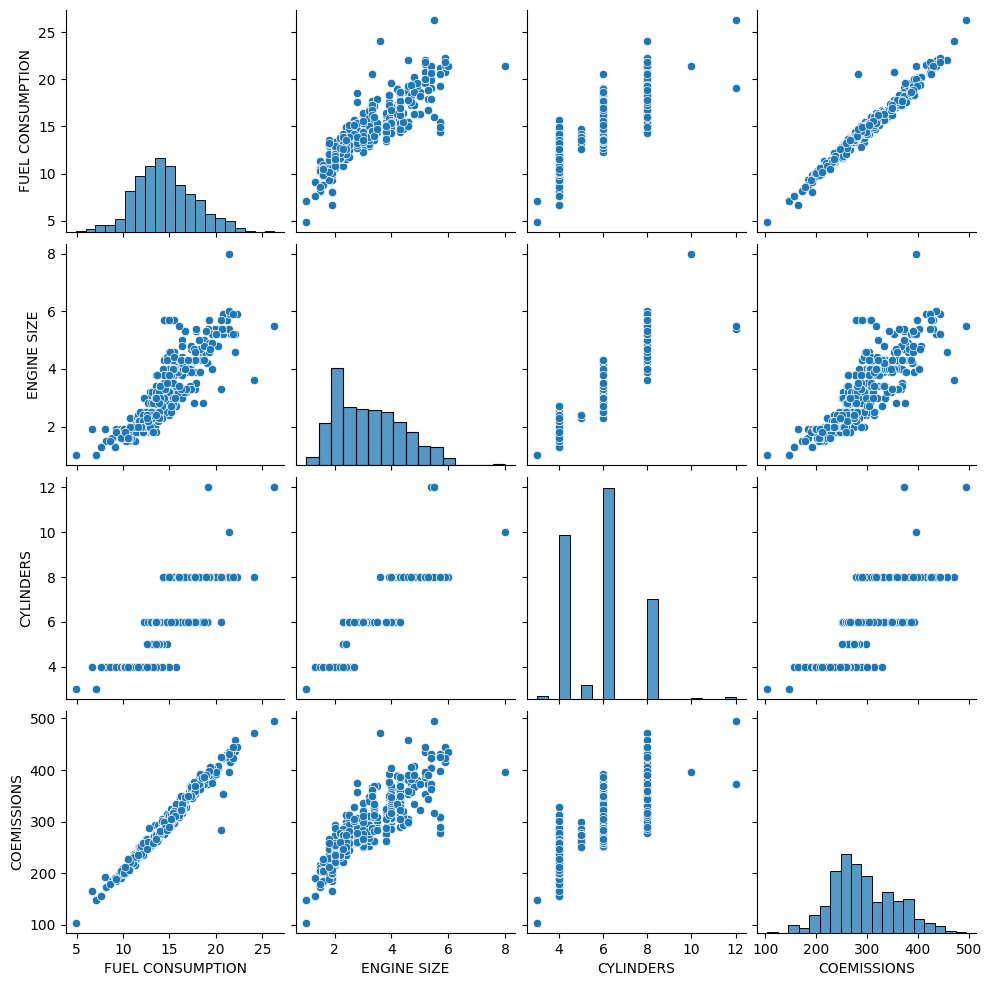

In [61]:
#@title Code - View pairplot
sns.pairplot(training_df, x_vars=["FUEL CONSUMPTION", "ENGINE SIZE", "CYLINDERS","COEMISSIONS"], y_vars=["FUEL CONSUMPTION", "ENGINE SIZE", "CYLINDERS", "COEMISSIONS"])

In [64]:
import numpy as np
import pandas as pd

def linear_regression(X, y, learning_rate, epochs):
    """Train a linear regression model using gradient descent."""
    m, n = X.shape  # m: number of samples, n: number of features
    weights = np.zeros(n)  # Initialize weights
    bias = 0  # Initialize bias

    for epoch in range(epochs):
        # Make predictions
        y_pred = X.dot(weights) + bias

        # Compute the gradients
        error = y_pred - y
        weight_gradient = (1 / m) * (X.T.dot(error))
        bias_gradient = (1 / m) * np.sum(error)

        # Update weights and bias
        weights -= learning_rate * weight_gradient
        bias -= learning_rate * bias_gradient

        # Optional: Print loss for every 100 epochs
        if epoch % 100 == 0:
            loss = (1 / (2 * m)) * np.sum(error ** 2)
            print(f"Epoch {epoch}, Loss: {loss}")

    return weights, bias

def train_model(df, feature_names, label_name, learning_rate, epochs):
    """Train the model by feeding it data."""
    features = df[feature_names].values
    label = df[label_name].values

    # Train the linear regression model
    trained_weights, trained_bias = linear_regression(features, label, learning_rate, epochs)

    return trained_weights, trained_bias

def run_experiment(df, feature_names, label_name, learning_rate, epochs):
    """Run the training experiment."""
    print(f'INFO: starting training experiment with features={feature_names} and label={label_name}\n')

    trained_weights, trained_bias = train_model(df, feature_names, label_name, learning_rate, epochs)

    print('\nSUCCESS: training experiment complete\n')
    print(f'Trained weights: {trained_weights}\nTrained bias: {trained_bias}')

    return trained_weights, trained_bias

print("SUCCESS: defining linear regression functions complete.")



SUCCESS: defining linear regression functions complete.


In [65]:
# Hyperparameters
learning_rate = 0.01
epochs = 500  # Increased for better convergence; adjust as necessary
batch_size = 50 # This won't be used in this version as we're not implementing batch training

# Specify the feature and the label.
features = ['ENGINE SIZE']  # Change this based on your dataset
label = 'FUEL CONSUMPTION'

# Run the experiment
model_1 = run_experiment(training_df, features, label, learning_rate, epochs)

# Assuming 'features' is a list of feature names and 'model_2' contains your trained weights and bias
trained_weights, trained_bias = model_2




# If you want to access the trained weights and bias
trained_weights, trained_bias = model_1
print(f'Trained weights: {trained_weights}')
print(f'Trained bias: {trained_bias}')
y_pred = training_df[features].dot(trained_weights) + trained_bias
y_true = training_df[label]

# Calculate MSE
mse = sum((y_true - y_pred)**2) / len(y_true)

# Calculate RMSE
rmse = mse**0.5

# Calculate R-squared
ss_res = sum((y_true - y_pred)**2)
ss_tot = sum((y_true - y_true.mean())**2)
r2 = 1 - (ss_res / ss_tot)

# Print metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")


INFO: starting training experiment with features=['ENGINE SIZE'] and label=FUEL CONSUMPTION

Epoch 0, Loss: 110.59243639921722
Epoch 100, Loss: 3.0197711538515954
Epoch 200, Loss: 2.658497283911575
Epoch 300, Loss: 2.370374986143259
Epoch 400, Loss: 2.14059236019469

SUCCESS: training experiment complete

Trained weights: [3.25082521]
Trained bias: 3.718837895888052
Trained weights: [3.25082521]
Trained bias: 3.718837895888052
Mean Squared Error (MSE): 3.9146733077233815
Root Mean Squared Error (RMSE): 1.9785533370933879
R-squared (R²) Score: 0.6082091729578349


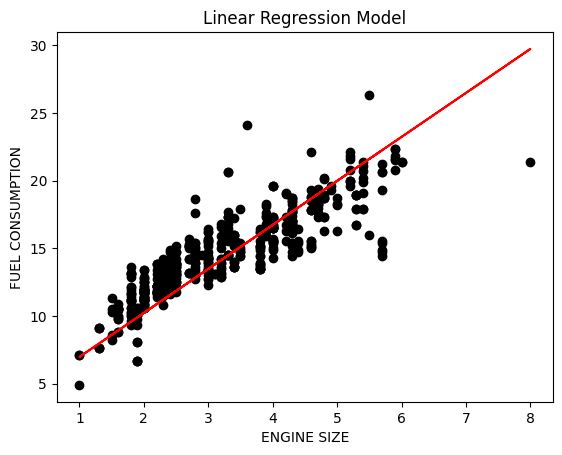

In [66]:
plt.scatter(training_df['ENGINE SIZE'], training_df['FUEL CONSUMPTION'], color='black')
plt.plot(training_df['ENGINE SIZE'], trained_weights[0] * training_df['ENGINE SIZE'] + trained_bias, color='red')
plt.xlabel('ENGINE SIZE')
plt.ylabel('FUEL CONSUMPTION')
plt.title('Linear Regression Model')
plt.show()

In [67]:
# The following variables are the hyperparameters.
learning_rate = 0.00001
epochs = 1000  # Increased for better convergence; adjust as necessary
batch_size = 50  # This won't be used in this version

# Assuming you want to use ENGINE SIZE, CYLINDERS, and CO2 EMISSIONS
features = ['ENGINE SIZE', 'CYLINDERS', 'COEMISSIONS']
label = 'FUEL CONSUMPTION'  # Change this if your target variable is different

# Run the experiment
model_2 = run_experiment(training_df, features, label, learning_rate, epochs)

# If you want to access the trained weights and bias
trained_weights, trained_bias = model_2
print(f'Trained weights: {trained_weights}')
print(f'Trained bias: {trained_bias}')

y_pred = training_df[features].dot(trained_weights) + trained_bias
y_true = training_df[label]

# Calculate MSE
mse = sum((y_true - y_pred)**2) / len(y_true)

# Calculate RMSE
rmse = mse**0.5

# Calculate R-squared
ss_res = sum((y_true - y_pred)**2)
ss_tot = sum((y_true - y_true.mean())**2)
r2 = 1 - (ss_res / ss_tot)

# Print metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")


INFO: starting training experiment with features=['ENGINE SIZE', 'CYLINDERS', 'COEMISSIONS'] and label=FUEL CONSUMPTION

Epoch 0, Loss: 110.59243639921722
Epoch 100, Loss: 0.19274178610425025
Epoch 200, Loss: 0.19269483365487514
Epoch 300, Loss: 0.19264798407379952
Epoch 400, Loss: 0.19260123713350003
Epoch 500, Loss: 0.19255459260695754
Epoch 600, Loss: 0.19250805026765674
Epoch 700, Loss: 0.19246160988958358
Epoch 800, Loss: 0.1924152712472257
Epoch 900, Loss: 0.19236903411556985

SUCCESS: training experiment complete

Trained weights: [0.00149166 0.00290836 0.04946926]
Trained bias: 0.00021899785797185675
Trained weights: [0.00149166 0.00290836 0.04946926]
Trained bias: 0.00021899785797185675
Mean Squared Error (MSE): 0.384645796540204
Root Mean Squared Error (RMSE): 0.62019819133903
R-squared (R²) Score: 0.9615036344290961


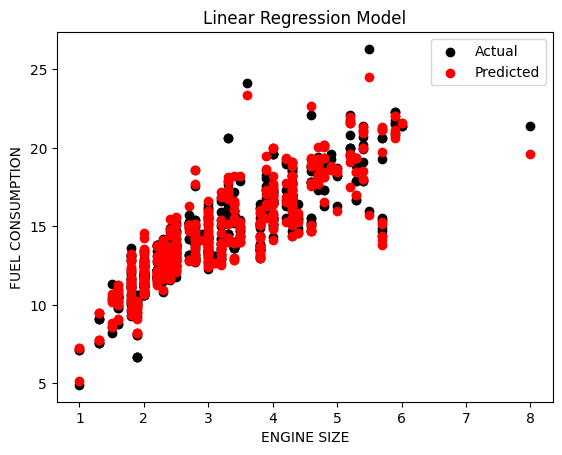

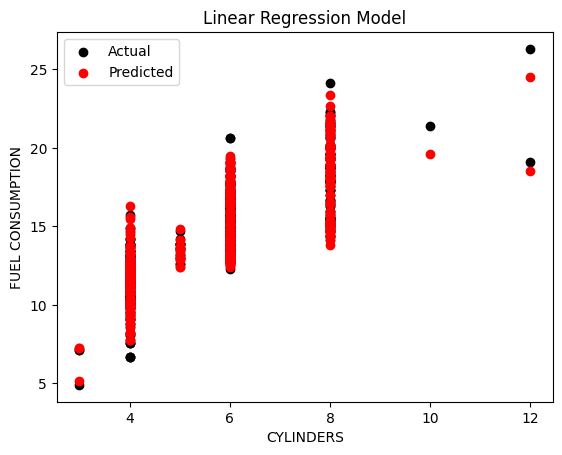

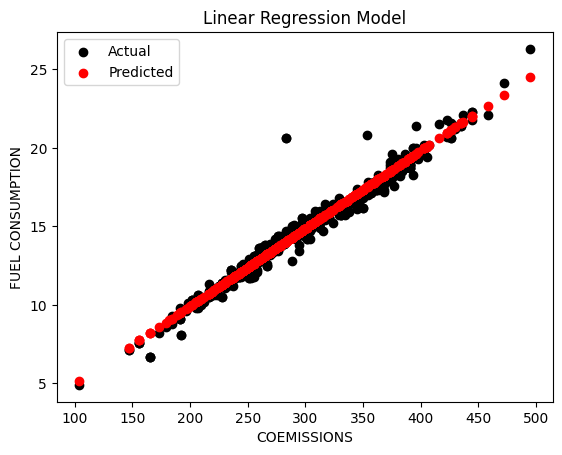

In [68]:
# Assuming 'features' is a list of feature names
y_pred = training_df[features].dot(trained_weights) + trained_bias

plt.scatter(training_df['ENGINE SIZE'], training_df['FUEL CONSUMPTION'], color='black', label='Actual')
plt.scatter(training_df['ENGINE SIZE'], y_pred, color='red', label='Predicted')
plt.xlabel('ENGINE SIZE')
plt.ylabel('FUEL CONSUMPTION')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

plt.scatter(training_df['CYLINDERS'], training_df['FUEL CONSUMPTION'], color='black', label='Actual')
plt.scatter(training_df['CYLINDERS'], y_pred, color='red', label='Predicted')
plt.xlabel('CYLINDERS')
plt.ylabel('FUEL CONSUMPTION')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

plt.scatter(training_df['COEMISSIONS'], training_df['FUEL CONSUMPTION'], color='black', label='Actual')
plt.scatter(training_df['COEMISSIONS'], y_pred, color='red', label='Predicted')
plt.xlabel('COEMISSIONS')
plt.ylabel('FUEL CONSUMPTION')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

In [78]:
import pandas as pd
import numpy as np

def format_currency(x):
    """Format numerical value as currency."""
    return "{:.2f}".format(x)

def build_batch(df, batch_size):
    """Build a random batch of data from the DataFrame."""
    batch = df.sample(n=batch_size).copy()
    batch.set_index(np.arange(batch_size), inplace=True)
    return batch

def predict_fuel_consumption(model, df, features, label, batch_size=50):
    """Make predictions on a batch of data."""
    batch = build_batch(df, batch_size)

    # Assuming model is a tuple of (trained_weights, trained_bias)
    trained_weights, trained_bias = model

    # Define a prediction function
    def predict(features, weights, bias):
        return features.dot(weights) + bias

    # Make predictions using the prediction function
    predicted_values = predict(batch.loc[:, features].values, trained_weights, trained_bias)

    data = {"PREDICTED_CONSUMPTION": [], "OBSERVED_CONSUMPTION": [], "L1_LOSS": [],
            features[0]: [], features[1]: [], features[2]: []}

    for i in range(batch_size):
        predicted = predicted_values[i]
        observed = batch.at[i, label]
        data["PREDICTED_CONSUMPTION"].append(format_currency(predicted))
        data["OBSERVED_CONSUMPTION"].append(format_currency(observed))
        data["L1_LOSS"].append(format_currency(abs(observed - predicted)))
        data[features[0]].append(batch.at[i, features[0]])
        data[features[1]].append(batch.at[i, features[1]])
        data[features[2]].append(batch.at[i, features[2]])

    output_df = pd.DataFrame(data)
    return output_df

def show_predictions(output):
  """Display the prediction results."""
  header = "-" * 80
  banner = header + "\n" + "|" + "PREDICTIONS".center(78) + "|" + "\n" + header
  print(banner)
  print(output)
  return

In [79]:
# Code - Make predictions

# Update the feature and label names
features = ['ENGINE SIZE', 'CYLINDERS', 'COEMISSIONS']
label = 'FUEL CONSUMPTION'

# Make predictions using the updated prediction function
output = predict_fuel_consumption(model_2, training_df, features, label)

# Display the predictions
show_predictions(output)


--------------------------------------------------------------------------------
|                                 PREDICTIONS                                  |
--------------------------------------------------------------------------------
   PREDICTED_CONSUMPTION OBSERVED_CONSUMPTION L1_LOSS  ENGINE SIZE  CYLINDERS  \
0                  13.23                13.60    0.37          2.8          6   
1                  17.44                17.30    0.14          4.0          6   
2                  13.57                13.60    0.03          2.4          5   
3                  19.47                20.00    0.53          5.2          8   
4                  18.57                18.60    0.03          2.8          6   
5                  12.88                13.10    0.22          2.5          6   
6                  18.48                18.90    0.42          4.8          8   
7                  17.19                16.70    0.49          4.0          6   
8                   7.73    